In [69]:
from loguru import logger
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [76]:
def read_data(file_path):
    df = pd.read_csv(file_path)
    logger.info(f" shape of data: {df.shape}")
    return df

def preprocess_data(df):
    logger.info(f"{df.isna().sum()}")
    logger.info(f"{df.duplicated().sum()}")
    df = df.drop_duplicates().reset_index(drop=True)
    df.nunique()
    le = LabelEncoder()
    df["TYPE"] = le.fit_transform(df["TYPE"])
    return df

def filter_data(df, select_columns):
    return df[select_columns]

def report_data(df):
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    print(df.describe().style.background_gradient("coolwarm"))
    
def split_data(df):
    X = df.drop(columns=["PRICE"])
    y = df["PRICE"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test
    
def build_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

def prediction(unseen_data, model):
    y_pred = model.predict(unseen_data)
    return y_pred

def model_performance(y_pred, y_test):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"R^2 Score: {r2}")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")


In [77]:
select_columns = [
    "PRICE",
    "BEDS",
    "BATH",
    "PROPERTYSQFT",
    "LATITUDE",
    "LONGITUDE",
    "TYPE",
]

2024-02-12 16:21:08.658 | INFO     | __main__:read_data:3 -  shape of data: (4801, 17)
2024-02-12 16:21:08.666 | INFO     | __main__:preprocess_data:7 - BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64


2024-02-12 16:21:08.675 | INFO     | __main__:preprocess_data:8 - 214


R^2 Score: 0.008868499921507844
Mean Squared Error: 20041991708634.14
Mean Absolute Error: 2311825.2059309944


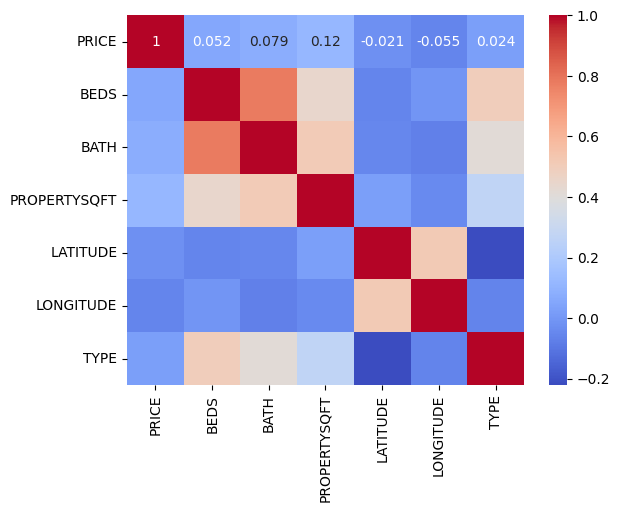

In [78]:
df = read_data("/mnt/c/Users/user/OneDrive/Desktop/nyc-home-price/NY-House-Dataset.csv")
df = preprocess_data(df)
df = filter_data(df, select_columns)
report_data(df)
X_train, X_test, y_train, y_test = split_data(df)
model = build_model(X_train, y_train)
y_pred = prediction(X_test, model)
model_performance(y_pred, y_test)